In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

# load the data
data = pd.read_csv("covtype.csv")

#if less than 1600 than it is 1(fire started there)
threshold = 1600

#our targer
data["fire_start"] = np.where(data["Horizontal_Distance_To_Fire_Points"] < threshold, 1, 0)

# Define the feature set.

X = data.drop(["Horizontal_Distance_To_Fire_Points", "Cover_Type", "fire_start"], axis=1)
y = data["fire_start"]

# Identify continuous features to scale.
continuous_features = [
    'Elevation', 'Aspect', 'Slope',
    'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
    'Horizontal_Distance_To_Roadways', 'Hillshade_9am',
    'Hillshade_Noon', 'Hillshade_3pm'
]

# Scale continuous features to the range [0, 1]
scaler = MinMaxScaler()
X[continuous_features] = scaler.fit_transform(X[continuous_features])


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

param_grid = [
    {'penalty':['l1','l2','elasticnet','none'],
    'C' : np.logspace(-4,4,20),
    'solver': ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter'  : [100,1000,2500,5000]
}
]


model = LogisticRegression(max_iter=100, solver='lbfgs', C=100)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))



/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.68      0.77      0.72     62450
           1       0.68      0.58      0.62     53753

    accuracy                           0.68    116203
   macro avg       0.68      0.67      0.67    116203
weighted avg       0.68      0.68      0.68    116203



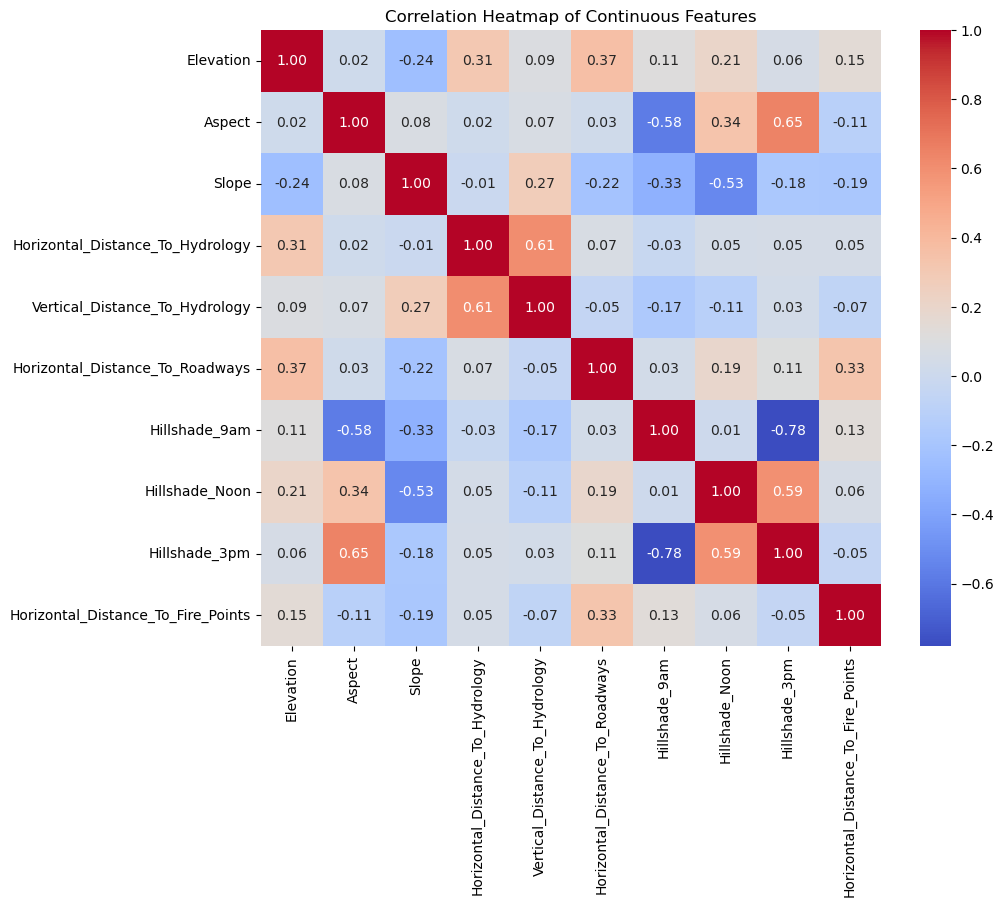

In [6]:
continuous_features = [
    'Elevation', 'Aspect', 'Slope',
    'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
    'Horizontal_Distance_To_Roadways', 'Hillshade_9am',
    'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points'
]

corr_cont = data[continuous_features].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_cont, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Continuous Features")
plt.show()

In [ ]:
import numpy as py
import pandas as pd
from sklearn.preprocessing import binarize, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

#load the data
data = pd.read_csv("covtype.csv")

#since fire point is our target we will binarize the feature with a threshold of 1600
data['Horizontal_Distance_To_Fire_Points'] = binarize(data.get('Horizontal_Distance_To_Fire_Points').to_frame(), threshold=1600)




import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load the data
data = pd.read_csv('/content/drive/MyDrive/covtype.csv')

# Binarize the target:
# Set target = 1 if Horizontal_Distance_To_Fire_Points < 1600, else 0.
data['Horizontal_Distance_To_Fire_Points'] = np.where(
    data['Horizontal_Distance_To_Fire_Points'] < 1600, 1, 0
)

# Drop Cover_Type since it's a different target and not needed for our fire model
data.drop(columns=['Cover_Type'], inplace=True)

# Prepare features and target using all areas
X = data.drop(columns=['Horizontal_Distance_To_Fire_Points'])
Y = data['Horizontal_Distance_To_Fire_Points']

# Scale the features to [0,1]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets (using stratification for balanced classes)
X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled, Y, test_size=0.25, random_state=42, stratify=Y
)

# Define a parameter grid that respects solver/penalty compatibilities:
param_grid = [
    # For solvers that support only 'l2' or no penalty:
    {
        'solver': ['lbfgs', 'newton-cg', 'sag'],
        'penalty': ['l2', None],
        'C': np.logspace(-3, 3, 7),
        'max_iter': [100, 1000]
    },
    # For liblinear, which supports 'l1' and 'l2':
    {
        'solver': ['liblinear'],
        'penalty': ['l1', 'l2'],
        'C': np.logspace(-3, 3, 7),
        'max_iter': [100, 1000]
    },
    # For saga, which supports 'l1', 'l2', 'elasticnet', or no penalty:
    {
        'solver': ['saga'],
        'penalty': ['l1', 'l2', 'elasticnet', None],
        'C': np.logspace(-3, 3, 7),
        'max_iter': [100, 1000]
    }
]

# Initialize GridSearchCV with 3-fold cross-validation
grid_search = GridSearchCV(
    LogisticRegression(),
    param_grid=param_grid,
    cv=3,
    verbose=2,
    n_jobs=-1
)

# Run grid search on the training data
best_clf = grid_search.fit(X_train, Y_train)

# Display the best estimator and its training accuracy
print("Best Estimator:")
print(best_clf.best_estimator_)
print(f"Training Accuracy: {best_clf.score(X_train, Y_train):.3f}")

# Evaluate performance on the test set
Y_pred = best_clf.predict(X_test)
print("Test Set Performance:")
print(classification_report(Y_test, Y_pred))


In [7]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
#from google.colab import drive

# Mount Google Drive
#drive.mount('/cdata = pd.read_csv("covtype.csv")

# Load the data
#data = pd.read_csv('/content/drive/MyDrive/covtype.csv')
data = pd.read_csv("covtype.csv")

# Binarize the target:
# Set target = 1 if Horizontal_Distance_To_Fire_Points < 1600, else 0.
data['Horizontal_Distance_To_Fire_Points'] = np.where(
    data['Horizontal_Distance_To_Fire_Points'] < 1600, 1, 0
)

# Drop Cover_Type since it's a different target and not needed for our fire model
data.drop(columns=['Cover_Type'], inplace=True)

# Prepare features and target using all areas
X = data.drop(columns=['Horizontal_Distance_To_Fire_Points'])
Y = data['Horizontal_Distance_To_Fire_Points']

# Scale the features to [0,1]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets (using stratification for balanced classes)
X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled, Y, test_size=0.25, random_state=42, stratify=Y
)

# Define a parameter grid that respects solver/penalty compatibilities:
param_grid = [
    # For solvers that support only 'l2' or no penalty:
    {
        'solver': ['lbfgs', 'newton-cg', 'sag'],
        'penalty': ['l2', None],
        'C': np.logspace(-3, 3, 7),
        'max_iter': [100, 1000]
    },
    # For liblinear, which supports 'l1' and 'l2':
    {
        'solver': ['liblinear'],
        'penalty': ['l1', 'l2'],
        'C': np.logspace(-3, 3, 7),
        'max_iter': [100, 1000]
    },
    # For saga, which supports 'l1', 'l2', 'elasticnet', or no penalty:
    {
        'solver': ['saga'],
        'penalty': ['l1', 'l2', 'elasticnet', None],
        'C': np.logspace(-3, 3, 7),
        'max_iter': [100, 1000]
    }
]

# Initialize GridSearchCV with 3-fold cross-validation
grid_search = GridSearchCV(
    LogisticRegression(),
    param_grid=param_grid,
    cv=3,
    verbose=2,
    n_jobs=-1
)

# Run grid search on the training data
best_clf = grid_search.fit(X_train, Y_train)

# Display the best estimator and its training accuracy
print("Best Estimator:")
print(best_clf.best_estimator_)
print(f"Training Accuracy: {best_clf.score(X_train, Y_train):.3f}")

# Evaluate performance on the test set
Y_pred = best_clf.predict(X_test)
print("Test Set Performance:")
print(classification_report(Y_test, Y_pred))


Fitting 3 folds for each of 168 candidates, totalling 504 fits
[CV] END ....C=0.001, max_iter=100, penalty=l2, solver=lbfgs; total time=   1.0s
[CV] END ....C=0.001, max_iter=100, penalty=l2, solver=lbfgs; total time=   1.3s
[CV] END ....C=0.001, max_iter=100, penalty=l2, solver=lbfgs; total time=   1.3s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.001, max_iter=100, penalty=l2, solver=newton-cg; total time=   1.6s
[CV] END C=0.001, max_iter=100, penalty=l2, solver=newton-cg; total time=   1.6s
[CV] END C=0.001, max_iter=100, penalty=l2, solver=newton-cg; total time=   1.7s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......C=0.001, max_iter=100, penalty=l2, solver=sag; total time=   5.1s
[CV] END ..C=0.001, max_iter=100, penalty=None, solver=lbfgs; total time=   3.8s
[CV] END ..C=0.001, max_iter=100, penalty=None, solver=lbfgs; total time=   3.9s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV] END ..C=0.001, max_iter=100, penalty=None, solver=lbfgs; total time=   3.8s
[CV] END ......C=0.001, max_iter=100, penalty=l2, solver=sag; total time=   5.6s
[CV] END ......C=0.001, max_iter=100, penalty=l2, solver=sag; total time=   5.0s
[CV] END C=0.001, max_iter=100, penalty=None, solver=newton-cg; total time=   4.2s
[CV] END C=0.001, max_iter=100, penalty=None, solver=newton-cg; total time=   4.6s
[CV] END ...C=0.001, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.7s
[CV] END ...C=0.001, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.8s
[CV] END ...C=0.001, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.8s
[CV] END C=0.001, max_iter=1000, penalty=l2, solver=newton-cg; total time=   1.1s
[CV] END C=0.001, max_iter=1000, penalty=l2, solver=newton-cg; total time=   1.3s
[CV] END C=0.001, max_iter=1000, penalty=l2, solver=newton-cg; total time=   1.1s


/opt/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END C=0.001, max_iter=100, penalty=None, solver=newton-cg; total time=   3.7s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .C=0.001, max_iter=1000, penalty=None, solver=lbfgs; total time=   2.8s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....C=0.001, max_iter=1000, penalty=l2, solver=sag; total time=   5.4s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....C=0.001, max_iter=1000, penalty=l2, solver=sag; total time=   5.0s
[CV] END .C=0.001, max_iter=1000, penalty=None, solver=lbfgs; total time=   3.5s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....C=0.001, max_iter=1000, penalty=l2, solver=sag; total time=   5.0s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.001, max_iter=1000, penalty=None, solver=newton-cg; total time=   4.0s
[CV] END C=0.001, max_iter=1000, penalty=None, solver=newton-cg; total time=   3.8s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.001, max_iter=1000, penalty=None, solver=newton-cg; total time=   4.0s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .C=0.001, max_iter=1000, penalty=None, solver=lbfgs; total time=   5.7s
[CV] END .....C=0.01, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.6s
[CV] END .....C=0.01, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.8s
[CV] END .....C=0.01, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.9s
[CV] END .C=0.01, max_iter=100, penalty=l2, solver=newton-cg; total time=   1.1s
[CV] END .C=0.01, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.9s
[CV] END .C=0.01, max_iter=100, penalty=l2, solver=newton-cg; total time=   1.0s
[CV] END .......C=0.01, max_iter=100, penalty=l2, solver=sag; total time=   4.1s
[CV] END .......C=0.01, max_iter=100, penalty=l2, solver=sag; total time=   3.9s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ...C=0.01, max_iter=100, penalty=None, solver=lbfgs; total time=   2.1s
[CV] END .......C=0.01, max_iter=100, penalty=l2, solver=sag; total time=   4.6s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ...C=0.01, max_iter=100, penalty=None, solver=lbfgs; total time=   2.4s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ...C=0.01, max_iter=100, penalty=None, solver=lbfgs; total time=   2.7s
[CV] END C=0.01, max_iter=100, penalty=None, solver=newton-cg; total time=   2.5s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.01, max_iter=100, penalty=None, solver=newton-cg; total time=   2.7s
[CV] END C=0.01, max_iter=100, penalty=None, solver=newton-cg; total time=   2.7s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter 

[CV] END ....C=0.001, max_iter=100, penalty=None, solver=sag; total time=  31.9s
[CV] END ....C=0.001, max_iter=100, penalty=None, solver=sag; total time=  32.1s
[CV] END ....C=0.001, max_iter=100, penalty=None, solver=sag; total time=  31.8s
[CV] END ....C=0.01, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.7s
[CV] END ....C=0.01, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.7s
[CV] END ....C=0.01, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.7s
[CV] END C=0.01, max_iter=1000, penalty=l2, solver=newton-cg; total time=   1.2s
[CV] END C=0.01, max_iter=1000, penalty=l2, solver=newton-cg; total time=   1.0s
[CV] END C=0.01, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.9s
[CV] END ......C=0.01, max_iter=1000, penalty=l2, solver=sag; total time=   4.4s
[CV] END ......C=0.01, max_iter=1000, penalty=l2, solver=sag; total time=   4.5s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ..C=0.01, max_iter=1000, penalty=None, solver=lbfgs; total time=   2.9s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......C=0.01, max_iter=1000, penalty=l2, solver=sag; total time=   4.6s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ..C=0.01, max_iter=1000, penalty=None, solver=lbfgs; total time=   2.6s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.01, max_iter=1000, penalty=None, solver=newton-cg; total time=   2.5s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ..C=0.01, max_iter=1000, penalty=None, solver=lbfgs; total time=   4.3s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.01, max_iter=1000, penalty=None, solver=newton-cg; total time=   2.5s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.01, max_iter=1000, penalty=None, solver=newton-cg; total time=   2.7s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....C=0.01, max_iter=100, penalty=None, solver=sag; total time=  29.3s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....C=0.01, max_iter=100, penalty=None, solver=sag; total time=  30.0s
[CV] END .....C=0.01, max_iter=100, penalty=None, solver=sag; total time=  28.8s
[CV] END ......C=0.1, max_iter=100, penalty=l2, solver=lbfgs; total time=   1.3s
[CV] END ......C=0.1, max_iter=100, penalty=l2, solver=lbfgs; total time=   1.6s
[CV] END ......C=0.1, max_iter=100, penalty=l2, solver=lbfgs; total time=   1.5s
[CV] END ..C=0.1, max_iter=100, penalty=l2, solver=newton-cg; total time=   1.4s
[CV] END ..C=0.1, max_iter=100, penalty=l2, solver=newton-cg; total time=   1.2s
[CV] END ..C=0.1, max_iter=100, penalty=l2, solver=newton-cg; total time=   1.1s
[CV] END ........C=0.1, max_iter=100, penalty=l2, solver=sag; total time=   4.8s
[CV] END ........C=0.1, max_iter=100, penalty=l2, solver=sag; total time=   5.6s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ....C=0.1, max_iter=100, penalty=None, solver=lbfgs; total time=   2.2s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ....C=0.1, max_iter=100, penalty=None, solver=lbfgs; total time=   2.2s
[CV] END ........C=0.1, max_iter=100, penalty=l2, solver=sag; total time=   5.5s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ....C=0.1, max_iter=100, penalty=None, solver=lbfgs; total time=   2.3s
[CV] END C=0.1, max_iter=100, penalty=None, solver=newton-cg; total time=   2.2s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.1, max_iter=100, penalty=None, solver=newton-cg; total time=   2.6s
[CV] END C=0.1, max_iter=100, penalty=None, solver=newton-cg; total time=   2.6s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......C=0.1, max_iter=100, penalty=None, solver=sag; total time=  27.1s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......C=0.1, max_iter=100, penalty=None, solver=sag; total time=  26.8s
[CV] END .....C=0.1, max_iter=1000, penalty=l2, solver=lbfgs; total time=   1.4s
[CV] END .....C=0.1, max_iter=1000, penalty=l2, solver=lbfgs; total time=   1.2s
[CV] END .....C=0.1, max_iter=1000, penalty=l2, solver=lbfgs; total time=   1.3s
[CV] END .C=0.1, max_iter=1000, penalty=l2, solver=newton-cg; total time=   1.2s
[CV] END .C=0.1, max_iter=1000, penalty=l2, solver=newton-cg; total time=   1.1s
[CV] END .C=0.1, max_iter=1000, penalty=l2, solver=newton-cg; total time=   1.1s
[CV] END .......C=0.1, max_iter=1000, penalty=l2, solver=sag; total time=   5.2s
[CV] END .......C=0.1, max_iter=1000, penalty=l2, solver=sag; total time=   5.1s
[CV] END .......C=0.1, max_iter=1000, penalty=l2, solver=sag; total time=   4.9s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ...C=0.1, max_iter=1000, penalty=None, solver=lbfgs; total time=   3.3s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......C=0.1, max_iter=100, penalty=None, solver=sag; total time=  28.2s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ...C=0.1, max_iter=1000, penalty=None, solver=lbfgs; total time=   2.7s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ...C=0.1, max_iter=1000, penalty=None, solver=lbfgs; total time=   4.6s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.1, max_iter=1000, penalty=None, solver=newton-cg; total time=   2.5s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.1, max_iter=1000, penalty=None, solver=newton-cg; total time=   2.6s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.1, max_iter=1000, penalty=None, solver=newton-cg; total time=   2.7s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ...C=0.001, max_iter=1000, penalty=None, solver=sag; total time= 2.6min


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ...C=0.001, max_iter=1000, penalty=None, solver=sag; total time= 2.9min


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ......C=1.0, max_iter=100, penalty=l2, solver=lbfgs; total time=   2.1s
[CV] END ......C=1.0, max_iter=100, penalty=l2, solver=lbfgs; total time=   2.2s
[CV] END ......C=1.0, max_iter=100, penalty=l2, solver=lbfgs; total time=   2.2s
[CV] END ..C=1.0, max_iter=100, penalty=l2, solver=newton-cg; total time=   1.5s
[CV] END ..C=1.0, max_iter=100, penalty=l2, solver=newton-cg; total time=   1.4s
[CV] END ..C=1.0, max_iter=100, penalty=l2, solver=newton-cg; total time=   1.3s
[CV] END ........C=1.0, max_iter=100, penalty=l2, solver=sag; total time=   9.0s
[CV] END ........C=1.0, max_iter=100, penalty=l2, solver=sag; total time=   7.4s
[CV] END ........C=1.0, max_iter=100, penalty=l2, solver=sag; total time=   7.5s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ....C=1.0, max_iter=100, penalty=None, solver=lbfgs; total time=   2.3s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ....C=1.0, max_iter=100, penalty=None, solver=lbfgs; total time=   2.2s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ....C=1.0, max_iter=100, penalty=None, solver=lbfgs; total time=   2.2s
[CV] END C=1.0, max_iter=100, penalty=None, solver=newton-cg; total time=   2.3s
[CV] END C=1.0, max_iter=100, penalty=None, solver=newton-cg; total time=   2.2s
[CV] END C=1.0, max_iter=100, penalty=None, solver=newton-cg; total time=   2.4s
[CV] END ....C=0.01, max_iter=1000, penalty=None, solver=sag; total time= 3.2min
[CV] END ...C=0.001, max_iter=1000, penalty=None, solver=sag; total time= 4.0min


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......C=1.0, max_iter=100, penalty=None, solver=sag; total time=  27.8s
[CV] END .....C=1.0, max_iter=1000, penalty=l2, solver=lbfgs; total time=   2.6s
[CV] END .....C=1.0, max_iter=1000, penalty=l2, solver=lbfgs; total time=   2.1s
[CV] END .....C=1.0, max_iter=1000, penalty=l2, solver=lbfgs; total time=   2.4s
[CV] END .C=1.0, max_iter=1000, penalty=l2, solver=newton-cg; total time=   1.3s
[CV] END .C=1.0, max_iter=1000, penalty=l2, solver=newton-cg; total time=   1.4s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......C=1.0, max_iter=100, penalty=None, solver=sag; total time=  28.3s
[CV] END .C=1.0, max_iter=1000, penalty=l2, solver=newton-cg; total time=   1.4s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......C=1.0, max_iter=100, penalty=None, solver=sag; total time=  29.0s
[CV] END .......C=1.0, max_iter=1000, penalty=l2, solver=sag; total time=   8.2s
[CV] END ....C=0.01, max_iter=1000, penalty=None, solver=sag; total time= 3.9min
[CV] END ....C=0.01, max_iter=1000, penalty=None, solver=sag; total time= 3.8min
[CV] END .......C=1.0, max_iter=1000, penalty=l2, solver=sag; total time=   9.8s
[CV] END ...C=1.0, max_iter=1000, penalty=None, solver=lbfgs; total time=   3.4s
[CV] END ...C=1.0, max_iter=1000, penalty=None, solver=lbfgs; total time=   3.4s
[CV] END .......C=1.0, max_iter=1000, penalty=l2, solver=sag; total time=  10.5s
[CV] END C=1.0, max_iter=1000, penalty=None, solver=newton-cg; total time=   3.7s
[CV] END C=1.0, max_iter=1000, penalty=None, solver=newton-cg; total time=   3.6s
[CV] END ...C=1.0, max_iter=1000, penalty=None, solver=lbfgs; total time=   5.9s
[CV] END C=1.0, max_iter=1000, penalty=None, solver=newton-cg; total time=   3.4s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .....C=10.0, max_iter=100, penalty=l2, solver=lbfgs; total time=   2.5s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .....C=10.0, max_iter=100, penalty=l2, solver=lbfgs; total time=   2.6s
[CV] END .C=10.0, max_iter=100, penalty=l2, solver=newton-cg; total time=   1.7s
[CV] END .....C=10.0, max_iter=100, penalty=l2, solver=lbfgs; total time=   2.7s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .C=10.0, max_iter=100, penalty=l2, solver=newton-cg; total time=   2.8s
[CV] END .C=10.0, max_iter=100, penalty=l2, solver=newton-cg; total time=   2.5s
[CV] END .....C=0.1, max_iter=1000, penalty=None, solver=sag; total time= 2.9min
[CV] END .....C=0.1, max_iter=1000, penalty=None, solver=sag; total time= 2.6min


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ...C=10.0, max_iter=100, penalty=None, solver=lbfgs; total time=   2.2s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ...C=10.0, max_iter=100, penalty=None, solver=lbfgs; total time=   2.3s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ...C=10.0, max_iter=100, penalty=None, solver=lbfgs; total time=   2.6s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .......C=10.0, max_iter=100, penalty=l2, solver=sag; total time=  29.7s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .......C=10.0, max_iter=100, penalty=l2, solver=sag; total time=  29.4s
[CV] END C=10.0, max_iter=100, penalty=None, solver=newton-cg; total time=   2.8s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=10.0, max_iter=100, penalty=None, solver=newton-cg; total time=   3.2s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=10.0, max_iter=100, penalty=None, solver=newton-cg; total time=   3.0s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....C=0.1, max_iter=1000, penalty=None, solver=sag; total time= 3.2min
[CV] END ....C=10.0, max_iter=1000, penalty=l2, solver=lbfgs; total time=   2.7s
[CV] END ....C=10.0, max_iter=1000, penalty=l2, solver=lbfgs; total time=   2.8s
[CV] END ....C=10.0, max_iter=1000, penalty=l2, solver=lbfgs; total time=   2.8s
[CV] END C=10.0, max_iter=1000, penalty=l2, solver=newton-cg; total time=   1.6s
[CV] END C=10.0, max_iter=1000, penalty=l2, solver=newton-cg; total time=   2.4s
[CV] END C=10.0, max_iter=1000, penalty=l2, solver=newton-cg; total time=   2.6s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=10.0, max_iter=100, penalty=l2, solver=sag; total time=  31.3s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....C=10.0, max_iter=100, penalty=None, solver=sag; total time=  30.2s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....C=10.0, max_iter=100, penalty=None, solver=sag; total time=  29.9s
[CV] END .....C=10.0, max_iter=100, penalty=None, solver=sag; total time=  29.3s
[CV] END ..C=10.0, max_iter=1000, penalty=None, solver=lbfgs; total time=   2.9s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ..C=10.0, max_iter=1000, penalty=None, solver=lbfgs; total time=   3.4s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=10.0, max_iter=1000, penalty=None, solver=newton-cg; total time=   2.7s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ..C=10.0, max_iter=1000, penalty=None, solver=lbfgs; total time=   4.7s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=10.0, max_iter=1000, penalty=None, solver=newton-cg; total time=   2.8s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=10.0, max_iter=1000, penalty=None, solver=newton-cg; total time=   2.7s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......C=10.0, max_iter=1000, penalty=l2, solver=sag; total time=  32.3s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......C=10.0, max_iter=1000, penalty=l2, solver=sag; total time=  31.8s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ....C=100.0, max_iter=100, penalty=l2, solver=lbfgs; total time=   2.3s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ....C=100.0, max_iter=100, penalty=l2, solver=lbfgs; total time=   2.4s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ....C=100.0, max_iter=100, penalty=l2, solver=lbfgs; total time=   2.3s
[CV] END C=100.0, max_iter=100, penalty=l2, solver=newton-cg; total time=   2.7s
[CV] END ......C=10.0, max_iter=1000, penalty=l2, solver=sag; total time=  32.5s
[CV] END C=100.0, max_iter=100, penalty=l2, solver=newton-cg; total time=   2.7s
[CV] END C=100.0, max_iter=100, penalty=l2, solver=newton-cg; total time=   2.8s
[CV] END .....C=1.0, max_iter=1000, penalty=None, solver=sag; total time= 2.1min


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......C=100.0, max_iter=100, penalty=l2, solver=sag; total time=  28.4s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......C=100.0, max_iter=100, penalty=l2, solver=sag; total time=  28.7s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ..C=100.0, max_iter=100, penalty=None, solver=lbfgs; total time=   2.2s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/pr

[CV] END ..C=100.0, max_iter=100, penalty=None, solver=lbfgs; total time=   2.7s
[CV] END ..C=100.0, max_iter=100, penalty=None, solver=lbfgs; total time=   2.5s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=100.0, max_iter=100, penalty=None, solver=newton-cg; total time=   2.7s
[CV] END C=100.0, max_iter=100, penalty=None, solver=newton-cg; total time=   2.9s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=100.0, max_iter=100, penalty=None, solver=newton-cg; total time=   2.5s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......C=100.0, max_iter=100, penalty=l2, solver=sag; total time=  29.3s
[CV] END .....C=1.0, max_iter=1000, penalty=None, solver=sag; total time= 2.9min


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ....C=100.0, max_iter=100, penalty=None, solver=sag; total time=  28.0s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ....C=100.0, max_iter=100, penalty=None, solver=sag; total time=  28.5s
[CV] END ...C=100.0, max_iter=1000, penalty=l2, solver=lbfgs; total time=   4.0s
[CV] END ...C=100.0, max_iter=1000, penalty=l2, solver=lbfgs; total time=   3.1s
[CV] END ...C=100.0, max_iter=1000, penalty=l2, solver=lbfgs; total time=   3.4s
[CV] END C=100.0, max_iter=1000, penalty=l2, solver=newton-cg; total time=   3.2s
[CV] END C=100.0, max_iter=1000, penalty=l2, solver=newton-cg; total time=   3.2s
[CV] END C=100.0, max_iter=1000, penalty=l2, solver=newton-cg; total time=   3.0s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ....C=100.0, max_iter=100, penalty=None, solver=sag; total time=  29.3s
[CV] END .C=100.0, max_iter=1000, penalty=None, solver=lbfgs; total time=   3.2s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .C=100.0, max_iter=1000, penalty=None, solver=lbfgs; total time=   2.5s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .C=100.0, max_iter=1000, penalty=None, solver=lbfgs; total time=   4.3s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=100.0, max_iter=1000, penalty=None, solver=newton-cg; total time=   2.6s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=100.0, max_iter=1000, penalty=None, solver=newton-cg; total time=   2.4s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=100.0, max_iter=1000, penalty=None, solver=newton-cg; total time=   2.5s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....C=1.0, max_iter=1000, penalty=None, solver=sag; total time= 3.6min


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ....C=10.0, max_iter=1000, penalty=None, solver=sag; total time= 2.5min


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ....C=10.0, max_iter=1000, penalty=None, solver=sag; total time= 2.4min


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ...C=1000.0, max_iter=100, penalty=l2, solver=lbfgs; total time=   2.1s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ...C=1000.0, max_iter=100, penalty=l2, solver=lbfgs; total time=   2.3s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ...C=1000.0, max_iter=100, penalty=l2, solver=lbfgs; total time=   2.5s
[CV] END C=1000.0, max_iter=100, penalty=l2, solver=newton-cg; total time=   2.5s
[CV] END C=1000.0, max_iter=100, penalty=l2, solver=newton-cg; total time=   2.4s
[CV] END C=1000.0, max_iter=100, penalty=l2, solver=newton-cg; total time=   2.3s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....C=1000.0, max_iter=100, penalty=l2, solver=sag; total time=  27.1s
[CV] END ....C=10.0, max_iter=1000, penalty=None, solver=sag; total time= 3.4min
[CV] END .....C=100.0, max_iter=1000, penalty=l2, solver=sag; total time= 2.0min


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....C=100.0, max_iter=1000, penalty=l2, solver=sag; total time= 2.1min


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....C=100.0, max_iter=1000, penalty=l2, solver=sag; total time= 2.1min


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .C=1000.0, max_iter=100, penalty=None, solver=lbfgs; total time=   2.6s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .C=1000.0, max_iter=100, penalty=None, solver=lbfgs; total time=   3.0s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .C=1000.0, max_iter=100, penalty=None, solver=lbfgs; total time=   2.9s
[CV] END C=1000.0, max_iter=100, penalty=None, solver=newton-cg; total time=   3.1s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=1000.0, max_iter=100, penalty=None, solver=newton-cg; total time=   3.4s
[CV] END C=1000.0, max_iter=100, penalty=None, solver=newton-cg; total time=   3.3s
[CV] END .....C=1000.0, max_iter=100, penalty=l2, solver=sag; total time=  29.7s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ..C=1000.0, max_iter=1000, penalty=l2, solver=lbfgs; total time=   2.7s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....C=1000.0, max_iter=100, penalty=l2, solver=sag; total time=  30.4s
[CV] END ..C=1000.0, max_iter=1000, penalty=l2, solver=lbfgs; total time=   2.7s
[CV] END ..C=1000.0, max_iter=1000, penalty=l2, solver=lbfgs; total time=   3.8s
[CV] END C=1000.0, max_iter=1000, penalty=l2, solver=newton-cg; total time=   2.6s
[CV] END C=1000.0, max_iter=1000, penalty=l2, solver=newton-cg; total time=   2.6s
[CV] END C=1000.0, max_iter=1000, penalty=l2, solver=newton-cg; total time=   2.7s
[CV] END ...C=100.0, max_iter=1000, penalty=None, solver=sag; total time= 2.1min


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ...C=1000.0, max_iter=100, penalty=None, solver=sag; total time=  29.4s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ...C=1000.0, max_iter=100, penalty=None, solver=sag; total time=  30.0s
[CV] END C=1000.0, max_iter=1000, penalty=None, solver=lbfgs; total time=   3.2s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ...C=1000.0, max_iter=100, penalty=None, solver=sag; total time=  30.6s
[CV] END C=1000.0, max_iter=1000, penalty=None, solver=lbfgs; total time=   3.3s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=1000.0, max_iter=1000, penalty=None, solver=newton-cg; total time=   3.1s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=1000.0, max_iter=1000, penalty=None, solver=lbfgs; total time=   5.4s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=1000.0, max_iter=1000, penalty=None, solver=newton-cg; total time=   3.2s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=1000.0, max_iter=1000, penalty=None, solver=newton-cg; total time=   3.0s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ...C=100.0, max_iter=1000, penalty=None, solver=sag; total time= 2.6min
[CV] END C=0.001, max_iter=100, penalty=l1, solver=liblinear; total time=   1.0s
[CV] END C=0.001, max_iter=100, penalty=l1, solver=liblinear; total time=   0.7s
[CV] END C=0.001, max_iter=100, penalty=l1, solver=liblinear; total time=   1.0s
[CV] END C=0.001, max_iter=100, penalty=l2, solver=liblinear; total time=   0.6s
[CV] END C=0.001, max_iter=100, penalty=l2, solver=liblinear; total time=   0.7s
[CV] END C=0.001, max_iter=100, penalty=l2, solver=liblinear; total time=   0.6s
[CV] END C=0.001, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.8s
[CV] END C=0.001, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.9s
[CV] END C=0.001, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.9s
[CV] END C=0.001, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.6s
[CV] END C=0.001, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.5s
[CV] END C=0.001, max_i

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ....C=1000.0, max_iter=1000, penalty=l2, solver=sag; total time= 6.3min


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ..C=0.1, max_iter=100, penalty=l1, solver=liblinear; total time= 5.9min
[CV] END ..C=0.1, max_iter=100, penalty=l1, solver=liblinear; total time= 9.7min
[CV] END ..C=1.0, max_iter=100, penalty=l2, solver=liblinear; total time=   8.7s
[CV] END ..C=1.0, max_iter=100, penalty=l2, solver=liblinear; total time=   7.6s
[CV] END ..C=1.0, max_iter=100, penalty=l2, solver=liblinear; total time=   7.8s
[CV] END ..C=0.1, max_iter=100, penalty=l1, solver=liblinear; total time=10.7min
[CV] END .C=0.1, max_iter=1000, penalty=l1, solver=liblinear; total time=11.3min
[CV] END .C=0.1, max_iter=1000, penalty=l1, solver=liblinear; total time=11.4min
[CV] END .C=1.0, max_iter=1000, penalty=l2, solver=liblinear; total time=   8.4s
[CV] END .C=1.0, max_iter=1000, penalty=l2, solver=liblinear; total time=   7.5s
[CV] END .C=1.0, max_iter=1000, penalty=l2, solver=liblinear; total time=   7.6s
[CV] END .C=0.1, max_iter=1000, penalty=l1, solver=liblinear; total time=13.3min


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ..C=1.0, max_iter=100, penalty=l1, solver=liblinear; total time=22.6min


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ..C=1.0, max_iter=100, penalty=l1, solver=liblinear; total time=24.0min
[CV] END .C=10.0, max_iter=100, penalty=l2, solver=liblinear; total time=  10.6s
[CV] END .C=10.0, max_iter=100, penalty=l2, solver=liblinear; total time=  10.8s
[CV] END .C=10.0, max_iter=100, penalty=l2, solver=liblinear; total time=  10.1s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END .C=10.0, max_iter=100, penalty=l1, solver=liblinear; total time=16.5min


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ..C=1.0, max_iter=100, penalty=l1, solver=liblinear; total time=26.1min


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END .C=10.0, max_iter=100, penalty=l1, solver=liblinear; total time=25.2min
[CV] END C=10.0, max_iter=1000, penalty=l2, solver=liblinear; total time=  10.6s
[CV] END C=10.0, max_iter=1000, penalty=l2, solver=liblinear; total time=  10.6s
[CV] END C=10.0, max_iter=1000, penalty=l2, solver=liblinear; total time=  10.0s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END .C=10.0, max_iter=100, penalty=l1, solver=liblinear; total time=14.6min
[CV] END .C=1.0, max_iter=1000, penalty=l1, solver=liblinear; total time=32.3min
[CV] END .C=1.0, max_iter=1000, penalty=l1, solver=liblinear; total time=33.9min
[CV] END C=100.0, max_iter=100, penalty=l2, solver=liblinear; total time=  11.9s
[CV] END C=100.0, max_iter=100, penalty=l2, solver=liblinear; total time=  10.0s
[CV] END C=100.0, max_iter=100, penalty=l2, solver=liblinear; total time=  10.6s
[CV] END .C=1.0, max_iter=1000, penalty=l1, solver=liblinear; total time=33.6min
[CV] END C=10.0, max_iter=1000, penalty=l1, solver=liblinear; total time=31.2min
[CV] END C=10.0, max_iter=1000, penalty=l1, solver=liblinear; total time=31.8min
[CV] END C=100.0, max_iter=1000, penalty=l2, solver=liblinear; total time=  11.7s
[CV] END C=100.0, max_iter=1000, penalty=l2, solver=liblinear; total time=  10.0s
[CV] END C=100.0, max_iter=1000, penalty=l2, solver=liblinear; total time=  10.7s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=100.0, max_iter=100, penalty=l1, solver=liblinear; total time=23.5min


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=100.0, max_iter=100, penalty=l1, solver=liblinear; total time=24.6min
[CV] END C=10.0, max_iter=1000, penalty=l1, solver=liblinear; total time=34.7min
[CV] END C=1000.0, max_iter=100, penalty=l2, solver=liblinear; total time=  11.5s
[CV] END C=1000.0, max_iter=100, penalty=l2, solver=liblinear; total time=  10.3s
[CV] END C=1000.0, max_iter=100, penalty=l2, solver=liblinear; total time=  10.6s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=100.0, max_iter=100, penalty=l1, solver=liblinear; total time=25.7min
[CV] END C=100.0, max_iter=1000, penalty=l1, solver=liblinear; total time=28.1min
[CV] END C=100.0, max_iter=1000, penalty=l1, solver=liblinear; total time=29.8min
[CV] END C=1000.0, max_iter=1000, penalty=l2, solver=liblinear; total time=  11.6s
[CV] END C=1000.0, max_iter=1000, penalty=l2, solver=liblinear; total time=  10.5s
[CV] END C=1000.0, max_iter=1000, penalty=l2, solver=liblinear; total time=  10.5s
[CV] END .....C=0.001, max_iter=100, penalty=l1, solver=saga; total time=   9.9s
[CV] END .....C=0.001, max_iter=100, penalty=l1, solver=saga; total time=   8.7s
[CV] END .....C=0.001, max_iter=100, penalty=l1, solver=saga; total time=   9.5s
[CV] END .....C=0.001, max_iter=100, penalty=l2, solver=saga; total time=   9.5s
[CV] END .....C=0.001, max_iter=100, penalty=l2, solver=saga; total time=   8.7s
[CV] END .....C=0.001, max_iter=100, penalty=l2, solver=saga; total time=   9.0s
[CV] END C=0.001, ma

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ...C=0.001, max_iter=100, penalty=None, solver=saga; total time=  43.0s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...C=0.001, max_iter=100, penalty=None, solver=saga; total time=  43.0s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...C=0.001, max_iter=100, penalty=None, solver=saga; total time=  43.5s
[CV] END ....C=0.001, max_iter=1000, penalty=l1, solver=saga; total time=   9.2s
[CV] END ....C=0.001, max_iter=1000, penalty=l1, solver=saga; total time=   9.5s
[CV] END ....C=0.001, max_iter=1000, penalty=l1, solver=saga; total time=  10.2s
[CV] END ....C=0.001, max_iter=1000, penalty=l2, solver=saga; total time=   7.9s
[CV] END ....C=0.001, max_iter=1000, penalty=l2, solver=saga; total time=   8.9s
[CV] END ....C=0.001, max_iter=1000, penalty=l2, solver=saga; total time=   8.8s
[CV] END C=0.001, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=0.001, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=0.001, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.1s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=1000.0, max_iter=100, penalty=l1, solver=liblinear; total time=17.0min


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=1000.0, max_iter=100, penalty=l1, solver=liblinear; total time=21.9min


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=1000.0, max_iter=100, penalty=l1, solver=liblinear; total time=20.7min
[CV] END ......C=0.01, max_iter=100, penalty=l1, solver=saga; total time=   9.7s
[CV] END ..C=0.001, max_iter=1000, penalty=None, solver=saga; total time= 6.4min
[CV] END ......C=0.01, max_iter=100, penalty=l1, solver=saga; total time=  10.2s
[CV] END ......C=0.01, max_iter=100, penalty=l1, solver=saga; total time=  10.3s
[CV] END ......C=0.01, max_iter=100, penalty=l2, solver=saga; total time=   8.0s
[CV] END ......C=0.01, max_iter=100, penalty=l2, solver=saga; total time=   8.5s
[CV] END C=0.01, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=0.01, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=0.01, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.1s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......C=0.01, max_iter=100, penalty=l2, solver=saga; total time=   8.9s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=100.0, max_iter=1000, penalty=l1, solver=liblinear; total time=26.4min


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ....C=0.01, max_iter=100, penalty=None, solver=saga; total time=  40.1s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ....C=0.01, max_iter=100, penalty=None, solver=saga; total time=  39.4s
[CV] END .....C=0.01, max_iter=1000, penalty=l1, solver=saga; total time=  10.1s
[CV] END .....C=0.01, max_iter=1000, penalty=l1, solver=saga; total time=   9.2s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ....C=0.01, max_iter=100, penalty=None, solver=saga; total time=  38.2s
[CV] END .....C=0.01, max_iter=1000, penalty=l1, solver=saga; total time=   9.3s
[CV] END .....C=0.01, max_iter=1000, penalty=l2, solver=saga; total time=   7.2s
[CV] END C=0.01, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=0.01, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=0.01, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.1s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....C=0.01, max_iter=1000, penalty=l2, solver=saga; total time=   7.4s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....C=0.01, max_iter=1000, penalty=l2, solver=saga; total time=   7.8s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=1000.0, max_iter=1000, penalty=l1, solver=liblinear; total time=20.3min
[CV] END .......C=0.1, max_iter=100, penalty=l1, solver=saga; total time=   7.8s
[CV] END .......C=0.1, max_iter=100, penalty=l1, solver=saga; total time=   8.1s
[CV] END C=1000.0, max_iter=1000, penalty=l1, solver=liblinear; total time=21.5min
[CV] END .......C=0.1, max_iter=100, penalty=l2, solver=saga; total time=   6.0s
[CV] END .......C=0.1, max_iter=100, penalty=l1, solver=saga; total time=   7.1s
[CV] END .......C=0.1, max_iter=100, penalty=l2, solver=saga; total time=   6.0s
[CV] END C=0.1, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=0.1, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=0.1, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.1s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .......C=0.1, max_iter=100, penalty=l2, solver=saga; total time=   6.6s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ..C=0.001, max_iter=1000, penalty=None, solver=saga; total time= 6.1min


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....C=0.1, max_iter=100, penalty=None, solver=saga; total time=  31.5s
[CV] END .....C=0.1, max_iter=100, penalty=None, solver=saga; total time=  31.3s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....C=0.1, max_iter=100, penalty=None, solver=saga; total time=  31.7s
[CV] END ......C=0.1, max_iter=1000, penalty=l1, solver=saga; total time=   7.1s
[CV] END ......C=0.1, max_iter=1000, penalty=l1, solver=saga; total time=   7.3s
[CV] END ......C=0.1, max_iter=1000, penalty=l1, solver=saga; total time=   7.0s
[CV] END ......C=0.1, max_iter=1000, penalty=l2, solver=saga; total time=   6.0s
[CV] END C=0.1, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END ......C=0.1, max_iter=1000, penalty=l2, solver=saga; total time=   6.4s
[CV] END C=0.1, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=0.1, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.1s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......C=0.1, max_iter=1000, penalty=l2, solver=saga; total time=   6.1s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ..C=0.001, max_iter=1000, penalty=None, solver=saga; total time= 5.7min
[CV] END .......C=1.0, max_iter=100, penalty=l1, solver=saga; total time=  11.9s
[CV] END .......C=1.0, max_iter=100, penalty=l1, solver=saga; total time=   9.8s
[CV] END .......C=1.0, max_iter=100, penalty=l1, solver=saga; total time=   9.5s
[CV] END .......C=1.0, max_iter=100, penalty=l2, solver=saga; total time=  14.0s
[CV] END .......C=1.0, max_iter=100, penalty=l2, solver=saga; total time=  13.9s
[CV] END .......C=1.0, max_iter=100, penalty=l2, solver=saga; total time=  13.6s
[CV] END C=1.0, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=1.0, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=1.0, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.1s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....C=1.0, max_iter=100, penalty=None, solver=saga; total time=  31.2s
[CV] END C=1000.0, max_iter=1000, penalty=l1, solver=liblinear; total time=17.2min


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....C=1.0, max_iter=100, penalty=None, solver=saga; total time=  29.9s
[CV] END ...C=0.01, max_iter=1000, penalty=None, solver=saga; total time= 4.7min
[CV] END ......C=1.0, max_iter=1000, penalty=l1, solver=saga; total time=  10.2s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....C=1.0, max_iter=100, penalty=None, solver=saga; total time=  29.3s
[CV] END ...C=0.01, max_iter=1000, penalty=None, solver=saga; total time= 4.8min
[CV] END ...C=0.01, max_iter=1000, penalty=None, solver=saga; total time= 4.8min
[CV] END ......C=1.0, max_iter=1000, penalty=l1, solver=saga; total time=  11.7s
[CV] END C=1.0, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=1.0, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=1.0, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END ......C=1.0, max_iter=1000, penalty=l1, solver=saga; total time=  10.6s
[CV] END ......C=1.0, max_iter=1000, penalty=l2, solver=saga; total time=  13.1s
[CV] END ......C=1.0, max_iter=1000, penalty=l2, solver=saga; total time=  13.0s
[CV] END ......C=1.0, max_iter=1000, penalty=l2, solver=saga; total time=  13.2s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......C=10.0, max_iter=100, penalty=l1, solver=saga; total time=  33.5s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......C=10.0, max_iter=100, penalty=l1, solver=saga; total time=  33.5s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......C=10.0, max_iter=100, penalty=l2, solver=saga; total time=  29.3s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......C=10.0, max_iter=100, penalty=l1, solver=saga; total time=  33.4s
[CV] END ....C=0.1, max_iter=1000, penalty=None, solver=saga; total time= 4.4min
[CV] END C=10.0, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=10.0, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=10.0, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.1s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......C=10.0, max_iter=100, penalty=l2, solver=saga; total time=  29.1s
[CV] END ....C=0.1, max_iter=1000, penalty=None, solver=saga; total time= 4.4min


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ....C=0.1, max_iter=1000, penalty=None, solver=saga; total time= 4.4min


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......C=10.0, max_iter=100, penalty=l2, solver=saga; total time=  29.5s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ....C=10.0, max_iter=100, penalty=None, solver=saga; total time=  29.2s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ....C=10.0, max_iter=100, penalty=None, solver=saga; total time=  29.3s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ....C=10.0, max_iter=100, penalty=None, solver=saga; total time=  29.0s
[CV] END .....C=10.0, max_iter=1000, penalty=l1, solver=saga; total time=  46.0s
[CV] END .....C=10.0, max_iter=1000, penalty=l1, solver=saga; total time=  49.2s
[CV] END C=10.0, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=10.0, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=10.0, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.1s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....C=10.0, max_iter=1000, penalty=l1, solver=saga; total time=  46.1s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....C=10.0, max_iter=1000, penalty=l2, solver=saga; total time=  53.4s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....C=10.0, max_iter=1000, penalty=l2, solver=saga; total time=  53.4s
[CV] END .....C=10.0, max_iter=1000, penalty=l2, solver=saga; total time=  52.9s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....C=100.0, max_iter=100, penalty=l1, solver=saga; total time=  33.2s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....C=100.0, max_iter=100, penalty=l1, solver=saga; total time=  33.1s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....C=100.0, max_iter=100, penalty=l1, solver=saga; total time=  33.7s
[CV] END ....C=1.0, max_iter=1000, penalty=None, solver=saga; total time= 4.2min
[CV] END ....C=1.0, max_iter=1000, penalty=None, solver=saga; total time= 4.3min
[CV] END C=100.0, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=100.0, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=100.0, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.1s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ....C=1.0, max_iter=1000, penalty=None, solver=saga; total time= 4.3min


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....C=100.0, max_iter=100, penalty=l2, solver=saga; total time=  29.1s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....C=100.0, max_iter=100, penalty=l2, solver=saga; total time=  29.1s
[CV] END .....C=100.0, max_iter=100, penalty=l2, solver=saga; total time=  29.7s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...C=100.0, max_iter=100, penalty=None, solver=saga; total time=  29.0s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...C=100.0, max_iter=100, penalty=None, solver=saga; total time=  29.4s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...C=100.0, max_iter=100, penalty=None, solver=saga; total time=  29.2s
[CV] END ...C=10.0, max_iter=1000, penalty=None, solver=saga; total time= 4.2min
[CV] END ...C=10.0, max_iter=1000, penalty=None, solver=saga; total time= 4.3min
[CV] END C=100.0, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=100.0, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=100.0, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.1s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ....C=100.0, max_iter=1000, penalty=l2, solver=saga; total time= 2.5min


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ...C=10.0, max_iter=1000, penalty=None, solver=saga; total time= 4.3min


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ....C=100.0, max_iter=1000, penalty=l2, solver=saga; total time= 2.5min
[CV] END ....C=100.0, max_iter=1000, penalty=l1, solver=saga; total time= 2.8min
[CV] END ....C=100.0, max_iter=1000, penalty=l1, solver=saga; total time= 2.9min
[CV] END ....C=100.0, max_iter=1000, penalty=l1, solver=saga; total time= 2.8min


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ....C=1000.0, max_iter=100, penalty=l1, solver=saga; total time=  33.4s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ....C=1000.0, max_iter=100, penalty=l1, solver=saga; total time=  33.3s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ....C=1000.0, max_iter=100, penalty=l1, solver=saga; total time=  33.7s
[CV] END C=1000.0, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=1000.0, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=1000.0, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.1s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ....C=1000.0, max_iter=100, penalty=l2, solver=saga; total time=  29.4s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ....C=1000.0, max_iter=100, penalty=l2, solver=saga; total time=  29.2s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ....C=1000.0, max_iter=100, penalty=l2, solver=saga; total time=  29.4s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..C=1000.0, max_iter=100, penalty=None, solver=saga; total time=  29.1s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..C=1000.0, max_iter=100, penalty=None, solver=saga; total time=  29.2s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..C=1000.0, max_iter=100, penalty=None, solver=saga; total time=  29.4s
[CV] END ....C=100.0, max_iter=1000, penalty=l2, solver=saga; total time= 2.4min
[CV] END ..C=100.0, max_iter=1000, penalty=None, solver=saga; total time= 4.2min
[CV] END ...C=1000.0, max_iter=1000, penalty=l2, solver=saga; total time= 2.6min
[CV] END C=1000.0, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=1000.0, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=1000.0, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.1s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ..C=100.0, max_iter=1000, penalty=None, solver=saga; total time= 4.3min


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ..C=100.0, max_iter=1000, penalty=None, solver=saga; total time= 4.3min


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ...C=1000.0, max_iter=1000, penalty=l2, solver=saga; total time= 3.1min
[CV] END ...C=1000.0, max_iter=1000, penalty=l1, solver=saga; total time= 4.4min
[CV] END ...C=1000.0, max_iter=1000, penalty=l1, solver=saga; total time= 4.4min
[CV] END ...C=1000.0, max_iter=1000, penalty=l1, solver=saga; total time= 4.4min
[CV] END ...C=1000.0, max_iter=1000, penalty=l2, solver=saga; total time= 2.6min
[CV] END .C=1000.0, max_iter=1000, penalty=None, solver=saga; total time= 3.3min
[CV] END .C=1000.0, max_iter=1000, penalty=None, solver=saga; total time= 3.3min
[CV] END .C=1000.0, max_iter=1000, penalty=None, solver=saga; total time= 3.3min


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
42 fits failed out of a total of 504.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
42 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py", line 1204, in fit
    raise

Best Estimator:
LogisticRegression(C=0.01, max_iter=1000, penalty='l1', solver='saga')
Training Accuracy: 0.681
Test Set Performance:
              precision    recall  f1-score   support

           0       0.68      0.77      0.72     78062
           1       0.68      0.58      0.63     67191

    accuracy                           0.68    145253
   macro avg       0.68      0.68      0.68    145253
weighted avg       0.68      0.68      0.68    145253



In [9]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
#from google.colab import drive

# Mount Google Drive
#drive.mount('/content/drive')

# Load the data
data = pd.read_csv('covtype.csv')

# Binarize the target:
# Set target = 1 if Horizontal_Distance_To_Fire_Points < 1600, else 0.
data['Horizontal_Distance_To_Fire_Points'] = np.where(
    data['Horizontal_Distance_To_Fire_Points'] < 1600, 1, 0
)

# Drop Cover_Type since it represents a different target
data.drop(columns=['Cover_Type'], inplace=True)

# Subset data for areas 2 and 4 (exclude areas 1 and 3)
subsetData_Area24 = data[~(data['Wilderness_Area1'] == 1) & ~(data['Wilderness_Area3'] == 1)]

# Prepare features (X24) and target (Y24)
X24 = subsetData_Area24.drop(columns=['Horizontal_Distance_To_Fire_Points'])
Y24 = subsetData_Area24['Horizontal_Distance_To_Fire_Points']

# Scale features
scaler2 = MinMaxScaler()
X24 = scaler2.fit_transform(X24)

# Split the data into training and testing sets (using stratification)
X24_train, X24_test, Y24_train, Y24_test = train_test_split(
    X24, Y24, test_size=0.25, random_state=42, stratify=Y24
)

# Define a parameter grid that respects solver/penalty compatibilities:
param_grid_24 = [
    # For solvers that support only 'l2' or no penalty
    {
        'solver': ['lbfgs', 'newton-cg', 'sag'],
        'penalty': ['l2', None],
        'C': np.logspace(-3, 3, 7),
        'max_iter': [100, 1000]
    },
    # For liblinear, which supports 'l1' and 'l2'
    {
        'solver': ['liblinear'],
        'penalty': ['l1', 'l2'],
        'C': np.logspace(-3, 3, 7),
        'max_iter': [100, 1000]
    },
    # For saga, which supports 'l1', 'l2', 'elasticnet', or no penalty
    {
        'solver': ['saga'],
        'penalty': ['l1', 'l2', 'elasticnet', None],
        'C': np.logspace(-3, 3, 7),
        'max_iter': [100, 1000]
    }
]

# Initialize GridSearchCV with 3-fold cross-validation
grid_search_24 = GridSearchCV(
    LogisticRegression(),
    param_grid=param_grid_24,
    cv=3,
    verbose=2,
    n_jobs=-1
)

# Fit the grid search on the training data for areas 2 and 4
best_clf_24 = grid_search_24.fit(X24_train, Y24_train)

# Display the best estimator and its training accuracy
print("Best Estimator for Areas 2 and 4:")
print(best_clf_24.best_estimator_)
print(f"Training Accuracy: {best_clf_24.score(X24_train, Y24_train):.3f}")

# Evaluate the best model on the test set
Y24_pred = best_clf_24.predict(X24_test)
print("Test Set Performance for Areas 2 and 4:")
print(classification_report(Y24_test, Y24_pred))


Fitting 3 folds for each of 168 candidates, totalling 504 fits
[CV] END ....C=0.001, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END ....C=0.001, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END ....C=0.001, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END C=0.001, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END C=0.001, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END C=0.001, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.2s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......C=0.001, max_iter=100, penalty=l2, solver=sag; total time=   0.8s
[CV] END ......C=0.001, max_iter=100, penalty=l2, solver=sag; total time=   0.9s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (st

[CV] END ..C=0.001, max_iter=100, penalty=None, solver=lbfgs; total time=   0.9s
[CV] END ..C=0.001, max_iter=100, penalty=None, solver=lbfgs; total time=   0.9s
[CV] END ..C=0.001, max_iter=100, penalty=None, solver=lbfgs; total time=   0.9s
[CV] END ......C=0.001, max_iter=100, penalty=l2, solver=sag; total time=   1.1s
[CV] END C=0.001, max_iter=100, penalty=None, solver=newton-cg; total time=   1.0s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ...C=0.001, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END C=0.001, max_iter=100, penalty=None, solver=newton-cg; total time=   1.0s
[CV] END ...C=0.001, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END ...C=0.001, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END C=0.001, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.3s
[CV] END C=0.001, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.3s
[CV] END C=0.001, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.3s
[CV] END C=0.001, max_iter=100, penalty=None, solver=newton-cg; total time=   0.9s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....C=0.001, max_iter=1000, penalty=l2, solver=sag; total time=   0.6s
[CV] END .....C=0.001, max_iter=1000, penalty=l2, solver=sag; total time=   0.8s
[CV] END .....C=0.001, max_iter=1000, penalty=l2, solver=sag; total time=   0.6s
[CV] END .C=0.001, max_iter=1000, penalty=None, solver=lbfgs; total time=   0.6s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .C=0.001, max_iter=1000, penalty=None, solver=lbfgs; total time=   0.8s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.001, max_iter=1000, penalty=None, solver=newton-cg; total time=   0.7s
[CV] END C=0.001, max_iter=1000, penalty=None, solver=newton-cg; total time=   0.8s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.001, max_iter=1000, penalty=None, solver=newton-cg; total time=   0.8s
[CV] END .....C=0.01, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.2s
[CV] END .C=0.001, max_iter=1000, penalty=None, solver=lbfgs; total time=   1.3s
[CV] END .....C=0.01, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.2s
[CV] END .....C=0.01, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.2s
[CV] END .C=0.01, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END .C=0.01, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END .C=0.01, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END .......C=0.01, max_iter=100, penalty=l2, solver=sag; total time=   0.5s
[CV] END .......C=0.01, max_iter=100, penalty=l2, solver=sag; total time=   0.6s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .......C=0.01, max_iter=100, penalty=l2, solver=sag; total time=   0.6s
[CV] END ...C=0.01, max_iter=100, penalty=None, solver=lbfgs; total time=   0.6s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (st

[CV] END ...C=0.01, max_iter=100, penalty=None, solver=lbfgs; total time=   0.6s
[CV] END ...C=0.01, max_iter=100, penalty=None, solver=lbfgs; total time=   0.6s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalt

[CV] END ....C=0.001, max_iter=100, penalty=None, solver=sag; total time=   5.5s
[CV] END C=0.01, max_iter=100, penalty=None, solver=newton-cg; total time=   0.6s
[CV] END C=0.01, max_iter=100, penalty=None, solver=newton-cg; total time=   0.7s
[CV] END ....C=0.001, max_iter=100, penalty=None, solver=sag; total time=   5.7s
[CV] END ....C=0.001, max_iter=100, penalty=None, solver=sag; total time=   5.6s
[CV] END ....C=0.01, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END ....C=0.01, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.2s
[CV] END ....C=0.01, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END C=0.01, max_iter=100, penalty=None, solver=newton-cg; total time=   0.7s
[CV] END C=0.01, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END C=0.01, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END C=0.01, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END ......C=0.01, ma

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......C=0.01, max_iter=1000, penalty=l2, solver=sag; total time=   0.8s
[CV] END ..C=0.01, max_iter=1000, penalty=None, solver=lbfgs; total time=   0.7s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ..C=0.01, max_iter=1000, penalty=None, solver=lbfgs; total time=   0.6s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ..C=0.01, max_iter=1000, penalty=None, solver=lbfgs; total time=   1.1s
[CV] END C=0.01, max_iter=1000, penalty=None, solver=newton-cg; total time=   0.7s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.01, max_iter=1000, penalty=None, solver=newton-cg; total time=   0.5s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.01, max_iter=1000, penalty=None, solver=newton-cg; total time=   0.7s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....C=0.01, max_iter=100, penalty=None, solver=sag; total time=   4.9s
[CV] END .....C=0.01, max_iter=100, penalty=None, solver=sag; total time=   4.9s
[CV] END .....C=0.01, max_iter=100, penalty=None, solver=sag; total time=   5.0s
[CV] END ......C=0.1, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.3s
[CV] END ......C=0.1, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.4s
[CV] END ..C=0.1, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.4s
[CV] END ......C=0.1, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.4s
[CV] END ..C=0.1, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.3s
[CV] END ..C=0.1, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.4s
[CV] END ........C=0.1, max_iter=100, penalty=l2, solver=sag; total time=   0.8s
[CV] END ........C=0.1, max_iter=100, penalty=l2, solver=sag; total time=   0.8s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore t

[CV] END ....C=0.1, max_iter=100, penalty=None, solver=lbfgs; total time=   0.6s
[CV] END ........C=0.1, max_iter=100, penalty=l2, solver=sag; total time=   0.8s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/pr

[CV] END ....C=0.1, max_iter=100, penalty=None, solver=lbfgs; total time=   0.6s
[CV] END ....C=0.1, max_iter=100, penalty=None, solver=lbfgs; total time=   0.6s
[CV] END C=0.1, max_iter=100, penalty=None, solver=newton-cg; total time=   0.5s
[CV] END C=0.1, max_iter=100, penalty=None, solver=newton-cg; total time=   0.8s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.1, max_iter=100, penalty=None, solver=newton-cg; total time=   0.7s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......C=0.1, max_iter=100, penalty=None, solver=sag; total time=   4.6s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......C=0.1, max_iter=100, penalty=None, solver=sag; total time=   4.4s
[CV] END .....C=0.1, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.2s
[CV] END .....C=0.1, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.3s
[CV] END .....C=0.1, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.3s
[CV] END .C=0.1, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.3s
[CV] END .C=0.1, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.3s
[CV] END .C=0.1, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.3s
[CV] END .......C=0.1, max_iter=1000, penalty=l2, solver=sag; total time=   0.7s
[CV] END .......C=0.1, max_iter=1000, penalty=l2, solver=sag; total time=   0.6s
[CV] END ...C=0.001, max_iter=1000, penalty=None, solver=sag; total time=  21.0s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .......C=0.1, max_iter=1000, penalty=l2, solver=sag; total time=   0.8s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......C=0.1, max_iter=100, penalty=None, solver=sag; total time=   4.4s
[CV] END ...C=0.1, max_iter=1000, penalty=None, solver=lbfgs; total time=   0.7s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ...C=0.1, max_iter=1000, penalty=None, solver=lbfgs; total time=   0.8s
[CV] END ...C=0.001, max_iter=1000, penalty=None, solver=sag; total time=  22.7s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.1, max_iter=1000, penalty=None, solver=newton-cg; total time=   1.1s
[CV] END C=0.1, max_iter=1000, penalty=None, solver=newton-cg; total time=   0.7s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ...C=0.1, max_iter=1000, penalty=None, solver=lbfgs; total time=   1.5s
[CV] END C=0.1, max_iter=1000, penalty=None, solver=newton-cg; total time=   1.0s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ...C=0.001, max_iter=1000, penalty=None, solver=sag; total time=  23.9s
[CV] END ......C=1.0, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.6s
[CV] END ......C=1.0, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.6s
[CV] END ......C=1.0, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.7s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..C=1.0, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.5s
[CV] END ..C=1.0, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.5s
[CV] END ..C=1.0, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.4s
[CV] END ........C=1.0, max_iter=100, penalty=l2, solver=sag; total time=   1.2s
[CV] END ........C=1.0, max_iter=100, penalty=l2, solver=sag; total time=   1.0s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ....C=1.0, max_iter=100, penalty=None, solver=lbfgs; total time=   0.5s
[CV] END ........C=1.0, max_iter=100, penalty=l2, solver=sag; total time=   1.2s
[CV] END ....C=1.0, max_iter=100, penalty=None, solver=lbfgs; total time=   0.5s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV] END ....C=1.0, max_iter=100, penalty=None, solver=lbfgs; total time=   0.6s
[CV] END C=1.0, max_iter=100, penalty=None, solver=newton-cg; total time=   0.6s
[CV] END C=1.0, max_iter=100, penalty=None, solver=newton-cg; total time=   0.5s
[CV] END ....C=0.01, max_iter=1000, penalty=None, solver=sag; total time=  20.3s
[CV] END C=1.0, max_iter=100, penalty=None, solver=newton-cg; total time=   0.7s
[CV] END ....C=0.01, max_iter=1000, penalty=None, solver=sag; total time=  22.2s
[CV] END .....C=1.0, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.5s
[CV] END .....C=1.0, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.7s
[CV] END .....C=1.0, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.6s
[CV] END .C=1.0, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.5s
[CV] END .C=1.0, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.5s
[CV] END ....C=0.01, max_iter=1000, penalty=None, solver=sag; total time=  25.2s
[CV] END .C=1.0, max_iter=10

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......C=1.0, max_iter=100, penalty=None, solver=sag; total time=   4.9s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......C=1.0, max_iter=100, penalty=None, solver=sag; total time=   5.0s
[CV] END ...C=1.0, max_iter=1000, penalty=None, solver=lbfgs; total time=   0.8s
[CV] END ...C=1.0, max_iter=1000, penalty=None, solver=lbfgs; total time=   0.6s
[CV] END .......C=1.0, max_iter=1000, penalty=l2, solver=sag; total time=   1.4s
[CV] END .......C=1.0, max_iter=1000, penalty=l2, solver=sag; total time=   1.5s
[CV] END .......C=1.0, max_iter=1000, penalty=l2, solver=sag; total time=   1.8s
[CV] END C=1.0, max_iter=1000, penalty=None, solver=newton-cg; total time=   0.9s
[CV] END C=1.0, max_iter=1000, penalty=None, solver=newton-cg; total time=   0.7s
[CV] END ...C=1.0, max_iter=1000, penalty=None, solver=lbfgs; total time=   1.4s
[CV] END C=1.0, max_iter=1000, penalty=None, solver=newton-cg; total time=   0.9s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV] END .....C=10.0, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.6s
[CV] END .....C=10.0, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.6s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .....C=10.0, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.7s
[CV] END .C=10.0, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.7s
[CV] END .C=10.0, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.7s
[CV] END .C=10.0, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.7s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .......C=10.0, max_iter=100, penalty=l2, solver=sag; total time=   4.2s
[CV] END .......C=10.0, max_iter=100, penalty=l2, solver=sag; total time=   4.3s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ...C=10.0, max_iter=100, penalty=None, solver=lbfgs; total time=   0.6s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ...C=10.0, max_iter=100, penalty=None, solver=lbfgs; total time=   0.5s
[CV] END .....C=0.1, max_iter=1000, penalty=None, solver=sag; total time=  20.4s
[CV] END ...C=10.0, max_iter=100, penalty=None, solver=lbfgs; total time=   0.6s
[CV] END C=10.0, max_iter=100, penalty=None, solver=newton-cg; total time=   0.6s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=10.0, max_iter=100, penalty=None, solver=newton-cg; total time=   0.6s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=10.0, max_iter=100, penalty=None, solver=newton-cg; total time=   0.8s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....C=0.1, max_iter=1000, penalty=None, solver=sag; total time=  23.0s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=10.0, max_iter=100, penalty=l2, solver=sag; total time=   5.0s
[CV] END .....C=0.1, max_iter=1000, penalty=None, solver=sag; total time=  24.8s
[CV] END ....C=10.0, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.6s
[CV] END ....C=10.0, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.6s
[CV] END ....C=10.0, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.7s
[CV] END C=10.0, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.6s
[CV] END C=10.0, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.6s
[CV] END C=10.0, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.6s
[CV] END .....C=10.0, max_iter=100, penalty=None, solver=sag; total time=   5.1s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....C=10.0, max_iter=100, penalty=None, solver=sag; total time=   4.9s
[CV] END ..C=10.0, max_iter=1000, penalty=None, solver=lbfgs; total time=   0.7s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....C=10.0, max_iter=100, penalty=None, solver=sag; total time=   5.0s
[CV] END ..C=10.0, max_iter=1000, penalty=None, solver=lbfgs; total time=   0.6s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=10.0, max_iter=1000, penalty=None, solver=newton-cg; total time=   0.6s
[CV] END ..C=10.0, max_iter=1000, penalty=None, solver=lbfgs; total time=   1.0s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=10.0, max_iter=1000, penalty=None, solver=newton-cg; total time=   0.5s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=10.0, max_iter=1000, penalty=None, solver=newton-cg; total time=   0.6s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....C=1.0, max_iter=1000, penalty=None, solver=sag; total time=  20.9s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......C=10.0, max_iter=1000, penalty=l2, solver=sag; total time=   8.1s
[CV] END ......C=10.0, max_iter=1000, penalty=l2, solver=sag; total time=   8.1s
[CV] END ......C=10.0, max_iter=1000, penalty=l2, solver=sag; total time=   8.1s
[CV] END ....C=100.0, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.6s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .....C=1.0, max_iter=1000, penalty=None, solver=sag; total time=  23.1s
[CV] END ....C=100.0, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.7s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV] END ....C=100.0, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.8s
[CV] END C=100.0, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.9s
[CV] END C=100.0, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.6s
[CV] END C=100.0, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.7s
[CV] END .....C=1.0, max_iter=1000, penalty=None, solver=sag; total time=  23.8s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ..C=100.0, max_iter=100, penalty=None, solver=lbfgs; total time=   0.6s
[CV] END ..C=100.0, max_iter=100, penalty=None, solver=lbfgs; total time=   0.6s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV] END ..C=100.0, max_iter=100, penalty=None, solver=lbfgs; total time=   0.7s
[CV] END C=100.0, max_iter=100, penalty=None, solver=newton-cg; total time=   0.7s
[CV] END C=100.0, max_iter=100, penalty=None, solver=newton-cg; total time=   0.6s
[CV] END C=100.0, max_iter=100, penalty=None, solver=newton-cg; total time=   0.8s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter 

[CV] END ......C=100.0, max_iter=100, penalty=l2, solver=sag; total time=   5.3s
[CV] END ......C=100.0, max_iter=100, penalty=l2, solver=sag; total time=   5.3s
[CV] END ......C=100.0, max_iter=100, penalty=l2, solver=sag; total time=   5.2s
[CV] END ...C=100.0, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.8s
[CV] END ...C=100.0, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.9s
[CV] END C=100.0, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.7s
[CV] END ...C=100.0, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.8s
[CV] END C=100.0, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.5s
[CV] END ....C=100.0, max_iter=100, penalty=None, solver=sag; total time=   5.1s
[CV] END C=100.0, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.7s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ....C=100.0, max_iter=100, penalty=None, solver=sag; total time=   5.1s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .C=100.0, max_iter=1000, penalty=None, solver=lbfgs; total time=   0.6s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .C=100.0, max_iter=1000, penalty=None, solver=lbfgs; total time=   0.6s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .C=100.0, max_iter=1000, penalty=None, solver=lbfgs; total time=   1.2s
[CV] END ....C=100.0, max_iter=100, penalty=None, solver=sag; total time=   5.2s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=100.0, max_iter=1000, penalty=None, solver=newton-cg; total time=   0.7s
[CV] END C=100.0, max_iter=1000, penalty=None, solver=newton-cg; total time=   0.5s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=100.0, max_iter=1000, penalty=None, solver=newton-cg; total time=   0.6s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ....C=10.0, max_iter=1000, penalty=None, solver=sag; total time=  22.8s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ....C=10.0, max_iter=1000, penalty=None, solver=sag; total time=  23.2s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ...C=1000.0, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.6s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ...C=1000.0, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.6s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ...C=1000.0, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.6s
[CV] END ....C=10.0, max_iter=1000, penalty=None, solver=sag; total time=  21.1s
[CV] END C=1000.0, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.6s
[CV] END C=1000.0, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.7s
[CV] END C=1000.0, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.7s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....C=1000.0, max_iter=100, penalty=l2, solver=sag; total time=   4.1s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....C=1000.0, max_iter=100, penalty=l2, solver=sag; total time=   4.2s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .C=1000.0, max_iter=100, penalty=None, solver=lbfgs; total time=   0.5s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .C=1000.0, max_iter=100, penalty=None, solver=lbfgs; total time=   0.6s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .C=1000.0, max_iter=100, penalty=None, solver=lbfgs; total time=   0.7s
[CV] END C=1000.0, max_iter=100, penalty=None, solver=newton-cg; total time=   0.8s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=1000.0, max_iter=100, penalty=None, solver=newton-cg; total time=   0.6s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=1000.0, max_iter=100, penalty=None, solver=newton-cg; total time=   1.2s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....C=1000.0, max_iter=100, penalty=l2, solver=sag; total time=   5.9s
[CV] END ...C=100.0, max_iter=1000, penalty=None, solver=sag; total time=  22.7s
[CV] END ...C=1000.0, max_iter=100, penalty=None, solver=sag; total time=   5.1s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...C=1000.0, max_iter=100, penalty=None, solver=sag; total time=   5.0s
[CV] END ..C=1000.0, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.8s
[CV] END ..C=1000.0, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.7s
[CV] END ..C=1000.0, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.7s
[CV] END ...C=100.0, max_iter=1000, penalty=None, solver=sag; total time=  25.3s
[CV] END C=1000.0, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.8s
[CV] END C=1000.0, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.6s
[CV] END C=1000.0, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.9s
[CV] END ...C=100.0, max_iter=1000, penalty=None, solver=sag; total time=  21.3s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=1000.0, max_iter=1000, penalty=None, solver=lbfgs; total time=   1.0s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=1000.0, max_iter=1000, penalty=None, solver=lbfgs; total time=   0.7s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ...C=1000.0, max_iter=100, penalty=None, solver=sag; total time=   5.8s
[CV] END C=1000.0, max_iter=1000, penalty=None, solver=lbfgs; total time=   1.2s
[CV] END C=1000.0, max_iter=1000, penalty=None, solver=newton-cg; total time=   0.6s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=1000.0, max_iter=1000, penalty=None, solver=newton-cg; total time=   0.5s
[CV] END C=1000.0, max_iter=1000, penalty=None, solver=newton-cg; total time=   0.7s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....C=100.0, max_iter=1000, penalty=l2, solver=sag; total time=  41.8s
[CV] END .....C=100.0, max_iter=1000, penalty=l2, solver=sag; total time=  41.9s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.001, max_iter=100, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END C=0.001, max_iter=100, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END C=0.001, max_iter=100, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END C=0.001, max_iter=100, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END .....C=100.0, max_iter=1000, penalty=l2, solver=sag; total time=  42.4s
[CV] END C=0.001, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END C=0.001, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END C=0.001, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END C=0.001, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END C=0.001, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END C=0.001, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END C=0.001, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END C=0.001, max_i

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ....C=1000.0, max_iter=1000, penalty=l2, solver=sag; total time=  52.3s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ....C=1000.0, max_iter=1000, penalty=l2, solver=sag; total time=  52.7s
[CV] END .C=1.0, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.5s
[CV] END .C=1.0, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.4s
[CV] END .C=1.0, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.4s
[CV] END .C=1.0, max_iter=1000, penalty=l1, solver=liblinear; total time= 1.6min
[CV] END ..C=1.0, max_iter=100, penalty=l1, solver=liblinear; total time= 1.6min
[CV] END .C=10.0, max_iter=100, penalty=l2, solver=liblinear; total time=   0.8s
[CV] END .C=10.0, max_iter=100, penalty=l2, solver=liblinear; total time=   0.7s
[CV] END .C=10.0, max_iter=100, penalty=l2, solver=liblinear; total time=   0.7s
[CV] END ..C=1.0, max_iter=100, penalty=l1, solver=liblinear; total time= 1.9min
[CV] END .C=1.0, max_iter=1000, penalty=l1, solver=liblinear; total time= 1.9min
[CV] END ..C=1.0, max_iter=100, penalty=l1, solver=liblinear; total time= 2.2min
[CV] END C=10.0, max_iter=10

/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END .C=10.0, max_iter=100, penalty=l1, solver=liblinear; total time= 1.1min


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=100.0, max_iter=100, penalty=l1, solver=liblinear; total time=  53.5s
[CV] END C=10.0, max_iter=1000, penalty=l1, solver=liblinear; total time= 2.1min
[CV] END C=10.0, max_iter=1000, penalty=l1, solver=liblinear; total time= 2.3min
[CV] END C=100.0, max_iter=1000, penalty=l2, solver=liblinear; total time=   1.5s
[CV] END C=100.0, max_iter=1000, penalty=l2, solver=liblinear; total time=   1.4s
[CV] END C=100.0, max_iter=1000, penalty=l2, solver=liblinear; total time=   1.5s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=100.0, max_iter=100, penalty=l1, solver=liblinear; total time= 2.0min
[CV] END C=10.0, max_iter=1000, penalty=l1, solver=liblinear; total time= 2.4min
[CV] END C=1000.0, max_iter=100, penalty=l2, solver=liblinear; total time=   1.0s
[CV] END C=1000.0, max_iter=100, penalty=l2, solver=liblinear; total time=   1.6s
[CV] END C=1000.0, max_iter=100, penalty=l2, solver=liblinear; total time=   1.4s
[CV] END C=100.0, max_iter=100, penalty=l1, solver=liblinear; total time= 2.2min
[CV] END C=100.0, max_iter=1000, penalty=l1, solver=liblinear; total time= 2.0min


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END C=1000.0, max_iter=100, penalty=l1, solver=liblinear; total time=  53.0s
[CV] END C=1000.0, max_iter=1000, penalty=l2, solver=liblinear; total time=   1.5s
[CV] END C=1000.0, max_iter=1000, penalty=l2, solver=liblinear; total time=   1.4s
[CV] END C=100.0, max_iter=1000, penalty=l1, solver=liblinear; total time= 2.4min
[CV] END C=1000.0, max_iter=1000, penalty=l2, solver=liblinear; total time=   1.2s
[CV] END .....C=0.001, max_iter=100, penalty=l1, solver=saga; total time=   0.9s
[CV] END .....C=0.001, max_iter=100, penalty=l1, solver=saga; total time=   1.1s
[CV] END .....C=0.001, max_iter=100, penalty=l1, solver=saga; total time=   0.9s
[CV] END .....C=0.001, max_iter=100, penalty=l2, solver=saga; total time=   1.3s
[CV] END .....C=0.001, max_iter=100, penalty=l2, solver=saga; total time=   1.2s
[CV] END C=0.001, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.001, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.0

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....C=0.001, max_iter=100, penalty=l2, solver=saga; total time=   1.3s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ...C=0.001, max_iter=100, penalty=None, solver=saga; total time=   6.8s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...C=0.001, max_iter=100, penalty=None, solver=saga; total time=   7.0s
[CV] END ....C=0.001, max_iter=1000, penalty=l1, solver=saga; total time=   1.2s
[CV] END ....C=0.001, max_iter=1000, penalty=l1, solver=saga; total time=   1.2s
[CV] END ....C=0.001, max_iter=1000, penalty=l1, solver=saga; total time=   1.4s
[CV] END ....C=0.001, max_iter=1000, penalty=l2, solver=saga; total time=   1.6s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...C=0.001, max_iter=100, penalty=None, solver=saga; total time=   7.1s
[CV] END ....C=0.001, max_iter=1000, penalty=l2, solver=saga; total time=   1.6s
[CV] END C=0.001, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.001, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.001, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ....C=0.001, max_iter=1000, penalty=l2, solver=saga; total time=   1.7s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=100.0, max_iter=1000, penalty=l1, solver=liblinear; total time= 2.1min


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=1000.0, max_iter=100, penalty=l1, solver=liblinear; total time= 1.7min
[CV] END ......C=0.01, max_iter=100, penalty=l1, solver=saga; total time=   1.6s
[CV] END ..C=0.001, max_iter=1000, penalty=None, solver=saga; total time=  29.7s
[CV] END ......C=0.01, max_iter=100, penalty=l1, solver=saga; total time=   1.6s
[CV] END ......C=0.01, max_iter=100, penalty=l1, solver=saga; total time=   1.7s
[CV] END ......C=0.01, max_iter=100, penalty=l2, solver=saga; total time=   1.4s
[CV] END ..C=0.001, max_iter=1000, penalty=None, solver=saga; total time=  32.0s
[CV] END C=0.01, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.01, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.01, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......C=0.01, max_iter=100, penalty=l2, solver=saga; total time=   1.4s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......C=0.01, max_iter=100, penalty=l2, solver=saga; total time=   1.4s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ....C=0.01, max_iter=100, penalty=None, solver=saga; total time=   7.4s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ....C=0.01, max_iter=100, penalty=None, solver=saga; total time=   7.1s
[CV] END ....C=0.01, max_iter=100, penalty=None, solver=saga; total time=   6.9s
[CV] END .....C=0.01, max_iter=1000, penalty=l1, solver=saga; total time=   1.9s
[CV] END .....C=0.01, max_iter=1000, penalty=l1, solver=saga; total time=   1.8s
[CV] END .....C=0.01, max_iter=1000, penalty=l1, solver=saga; total time=   2.1s
[CV] END ..C=0.001, max_iter=1000, penalty=None, solver=saga; total time=  27.6s
[CV] END C=0.01, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .....C=0.01, max_iter=1000, penalty=l2, solver=saga; total time=   1.2s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....C=0.01, max_iter=1000, penalty=l2, solver=saga; total time=   1.2s
[CV] END .....C=0.01, max_iter=1000, penalty=l2, solver=saga; total time=   1.2s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .......C=0.1, max_iter=100, penalty=l1, solver=saga; total time=   1.2s
[CV] END .......C=0.1, max_iter=100, penalty=l1, solver=saga; total time=   1.3s
[CV] END .......C=0.1, max_iter=100, penalty=l1, solver=saga; total time=   1.2s
[CV] END .......C=0.1, max_iter=100, penalty=l2, solver=saga; total time=   0.9s
[CV] END C=1000.0, max_iter=100, penalty=l1, solver=liblinear; total time= 1.8min


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END .......C=0.1, max_iter=100, penalty=l2, solver=saga; total time=   1.0s
[CV] END .......C=0.1, max_iter=100, penalty=l2, solver=saga; total time=   0.9s
[CV] END C=0.1, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.1, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.1, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....C=0.1, max_iter=100, penalty=None, solver=saga; total time=   5.8s
[CV] END .....C=0.1, max_iter=100, penalty=None, solver=saga; total time=   6.0s
[CV] END C=1000.0, max_iter=1000, penalty=l1, solver=liblinear; total time= 1.5min
[CV] END ......C=0.1, max_iter=1000, penalty=l1, solver=saga; total time=   1.1s
[CV] END ......C=0.1, max_iter=1000, penalty=l1, solver=saga; total time=   1.3s
[CV] END ......C=0.1, max_iter=1000, penalty=l2, solver=saga; total time=   1.0s
[CV] END ......C=0.1, max_iter=1000, penalty=l1, solver=saga; total time=   1.5s
[CV] END ......C=0.1, max_iter=1000, penalty=l2, solver=saga; total time=   1.0s
[CV] END C=0.1, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.1, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.1, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ......C=0.1, max_iter=1000, penalty=l2, solver=saga; total time=   1.0s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....C=0.1, max_iter=100, penalty=None, solver=saga; total time=   5.5s
[CV] END C=1000.0, max_iter=1000, penalty=l1, solver=liblinear; total time= 1.9min
[CV] END ...C=0.01, max_iter=1000, penalty=None, solver=saga; total time=  23.7s
[CV] END ...C=0.01, max_iter=1000, penalty=None, solver=saga; total time=  25.9s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=1.0, max_iter=100, penalty=l1, solver=saga; total time=   6.4s
[CV] END ...C=0.01, max_iter=1000, penalty=None, solver=saga; total time=  27.4s
[CV] END C=1000.0, max_iter=1000, penalty=l1, solver=liblinear; total time= 1.7min
[CV] END .......C=1.0, max_iter=100, penalty=l1, solver=saga; total time=   5.6s
[CV] END C=1.0, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=1.0, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=1.0, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .......C=1.0, max_iter=100, penalty=l2, solver=saga; total time=   3.5s
[CV] END .......C=1.0, max_iter=100, penalty=l2, solver=saga; total time=   3.6s
[CV] END .......C=1.0, max_iter=100, penalty=l2, solver=saga; total time=   3.9s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=1.0, max_iter=100, penalty=l1, solver=saga; total time=   6.2s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....C=1.0, max_iter=100, penalty=None, solver=saga; total time=   5.2s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....C=1.0, max_iter=100, penalty=None, solver=saga; total time=   5.4s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....C=1.0, max_iter=100, penalty=None, solver=saga; total time=   5.0s
[CV] END ......C=1.0, max_iter=1000, penalty=l1, solver=saga; total time=   4.9s
[CV] END ......C=1.0, max_iter=1000, penalty=l2, solver=saga; total time=   3.2s
[CV] END C=1.0, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=1.0, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=1.0, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ......C=1.0, max_iter=1000, penalty=l2, solver=saga; total time=   3.1s
[CV] END ....C=0.1, max_iter=1000, penalty=None, solver=saga; total time=  22.3s
[CV] END ....C=0.1, max_iter=1000, penalty=None, solver=saga; total time=  24.2s
[CV] END ......C=1.0, max_iter=1000, penalty=l2, solver=saga; total time=   3.0s
[CV] END ....C=0.1, max_iter=1000, penalty=None, solver=saga; total time=  25.2s
[CV] END ......C=1.0, max_iter=1000, penalty=l1, solver=saga; total time=  10.6s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......C=10.0, max_iter=100, penalty=l1, solver=saga; total time=   6.2s
[CV] END ......C=10.0, max_iter=100, penalty=l1, solver=saga; total time=   6.1s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......C=10.0, max_iter=100, penalty=l1, solver=saga; total time=   5.8s
[CV] END ......C=10.0, max_iter=100, penalty=l2, solver=saga; total time=   4.7s
[CV] END C=10.0, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=10.0, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=10.0, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ......C=1.0, max_iter=1000, penalty=l1, solver=saga; total time=  15.5s
[CV] END ......C=10.0, max_iter=100, penalty=l2, solver=saga; total time=   4.4s
[CV] END ......C=10.0, max_iter=100, penalty=l2, solver=saga; total time=   4.4s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ....C=10.0, max_iter=100, penalty=None, solver=saga; total time=   4.4s
[CV] END ....C=10.0, max_iter=100, penalty=None, solver=saga; total time=   4.4s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ....C=10.0, max_iter=100, penalty=None, solver=saga; total time=   4.5s
[CV] END ....C=1.0, max_iter=1000, penalty=None, solver=saga; total time=  20.4s
[CV] END ....C=1.0, max_iter=1000, penalty=None, solver=saga; total time=  22.1s
[CV] END C=10.0, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=10.0, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=10.0, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ....C=1.0, max_iter=1000, penalty=None, solver=saga; total time=  23.3s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....C=10.0, max_iter=1000, penalty=l2, solver=saga; total time=  14.7s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....C=10.0, max_iter=1000, penalty=l2, solver=saga; total time=  14.5s
[CV] END .....C=10.0, max_iter=1000, penalty=l2, solver=saga; total time=  14.6s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....C=100.0, max_iter=100, penalty=l1, solver=saga; total time=   5.7s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....C=100.0, max_iter=100, penalty=l1, solver=saga; total time=   5.5s
[CV] END .....C=100.0, max_iter=100, penalty=l1, solver=saga; total time=   5.5s
[CV] END ...C=10.0, max_iter=1000, penalty=None, solver=saga; total time=  21.6s
[CV] END .....C=10.0, max_iter=1000, penalty=l1, solver=saga; total time=  32.7s
[CV] END C=100.0, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=100.0, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=100.0, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....C=10.0, max_iter=1000, penalty=l1, solver=saga; total time=  33.3s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....C=100.0, max_iter=100, penalty=l2, solver=saga; total time=   4.9s
[CV] END .....C=100.0, max_iter=100, penalty=l2, solver=saga; total time=   4.8s
[CV] END .....C=10.0, max_iter=1000, penalty=l1, solver=saga; total time=  34.1s
[CV] END ...C=10.0, max_iter=1000, penalty=None, solver=saga; total time=  23.2s
[CV] END ...C=10.0, max_iter=1000, penalty=None, solver=saga; total time=  20.7s
[CV] END .....C=100.0, max_iter=100, penalty=l2, solver=saga; total time=   4.8s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...C=100.0, max_iter=100, penalty=None, solver=saga; total time=   5.5s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...C=100.0, max_iter=100, penalty=None, solver=saga; total time=   5.7s
[CV] END C=100.0, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=100.0, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=100.0, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ...C=100.0, max_iter=100, penalty=None, solver=saga; total time=   5.9s
[CV] END ....C=100.0, max_iter=1000, penalty=l1, solver=saga; total time=  25.6s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ....C=100.0, max_iter=1000, penalty=l1, solver=saga; total time=  26.2s
[CV] END ....C=100.0, max_iter=1000, penalty=l1, solver=saga; total time=  28.5s
[CV] END ..C=100.0, max_iter=1000, penalty=None, solver=saga; total time=  27.0s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ....C=1000.0, max_iter=100, penalty=l1, solver=saga; total time=   7.2s
[CV] END ..C=100.0, max_iter=1000, penalty=None, solver=saga; total time=  29.4s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ....C=1000.0, max_iter=100, penalty=l1, solver=saga; total time=   7.7s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ....C=1000.0, max_iter=100, penalty=l1, solver=saga; total time=   7.4s
[CV] END C=1000.0, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=1000.0, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=1000.0, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ....C=1000.0, max_iter=100, penalty=l2, solver=saga; total time=   5.8s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ....C=1000.0, max_iter=100, penalty=l2, solver=saga; total time=   5.1s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ....C=1000.0, max_iter=100, penalty=l2, solver=saga; total time=   4.4s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..C=1000.0, max_iter=100, penalty=None, solver=saga; total time=   4.5s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..C=1000.0, max_iter=100, penalty=None, solver=saga; total time=   4.7s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..C=1000.0, max_iter=100, penalty=None, solver=saga; total time=   4.8s
[CV] END ..C=100.0, max_iter=1000, penalty=None, solver=saga; total time=  23.1s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ....C=100.0, max_iter=1000, penalty=l2, solver=saga; total time=  54.0s
[CV] END ....C=100.0, max_iter=1000, penalty=l2, solver=saga; total time=  53.9s
[CV] END C=1000.0, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=1000.0, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=1000.0, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ....C=100.0, max_iter=1000, penalty=l2, solver=saga; total time=  53.5s
[CV] END ...C=1000.0, max_iter=1000, penalty=l2, solver=saga; total time=  16.8s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ...C=1000.0, max_iter=1000, penalty=l2, solver=saga; total time=  19.1s
[CV] END ...C=1000.0, max_iter=1000, penalty=l1, solver=saga; total time=  27.5s
[CV] END ...C=1000.0, max_iter=1000, penalty=l1, solver=saga; total time=  25.5s
[CV] END ...C=1000.0, max_iter=1000, penalty=l1, solver=saga; total time=  28.8s
[CV] END ...C=1000.0, max_iter=1000, penalty=l2, solver=saga; total time=  17.0s
[CV] END .C=1000.0, max_iter=1000, penalty=None, solver=saga; total time=  20.1s
[CV] END .C=1000.0, max_iter=1000, penalty=None, solver=saga; total time=  19.7s
[CV] END .C=1000.0, max_iter=1000, penalty=None, solver=saga; total time=  15.4s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
42 fits failed out of a total of 504.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
42 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py", line 1204, in fit
    raise

Best Estimator for Areas 2 and 4:
LogisticRegression(C=0.001, penalty=None)
Training Accuracy: 0.875
Test Set Performance for Areas 2 and 4:
              precision    recall  f1-score   support

           0       0.78      0.75      0.76      4440
           1       0.91      0.92      0.92     12273

    accuracy                           0.88     16713
   macro avg       0.84      0.84      0.84     16713
weighted avg       0.88      0.88      0.88     16713



/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
